In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 15:47:20.937998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:47:21.090112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:47:21.091771: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 15:47:22.130346: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 2)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

In [6]:
trainer.training_loop()

2023/08/13 15:47:24 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 15:47:24 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40
56/56 - 7s - loss: 0.7118 - recall: 0.7425 - binary_accuracy: 0.6525 - precision: 0.6982 - false_negatives: 138.0000 - false_positives: 172.0000 - val_loss: 0.5741 - val_recall: 0.8433 - val_binary_accuracy: 0.6847 - val_precision: 0.6975 - val_false_negatives: 21.0000 - val_false_positives: 49.0000 - 7s/epoch - 120ms/step


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/40
56/56 - 4s - loss: 0.5341 - recall: 0.7799 - binary_accuracy: 0.7343 - precision: 0.7784 - false_negatives: 118.0000 - false_positives: 119.0000 - val_loss: 0.6063 - val_recall: 0.9478 - val_binary_accuracy: 0.6532 - val_precision: 0.6447 - val_false_negatives: 7.0000 - val_false_positives: 70.0000 - 4s/epoch - 78ms/step
Epoch 3/40
56/56 - 4s - loss: 0.5030 - recall: 0.8228 - binary_accuracy: 0.7590 - precision: 0.7861 - false_negatives: 95.0000 - false_positives: 120.0000 - val_loss: 0.5051 - val_recall: 0.7537 - val_binary_accuracy: 0.7297 - val_precision: 0.7891 - val_false_negatives: 33.0000 - val_false_positives: 27.0000 - 4s/epoch - 67ms/step
Epoch 4/40
56/56 - 3s - loss: 0.4740 - recall: 0.8172 - binary_accuracy: 0.7825 - precision: 0.8202 - false_negatives: 98.0000 - false_positives: 96.0000 - val_loss: 0.5857 - val_recall: 0.5597 - val_binary_accuracy: 0.7027 - val_precision: 0.9146 - val_false_negatives: 59.0000 - val_false_positives: 7.0000 - 3s/epoch - 58ms/step


2023/08/13 15:50:11 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 15:50:11 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmp4msnzrn1/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4msnzrn1/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 2s 24ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9720149253731343, 'fp_Train_acc': 0.976457399103139, 'fp_Train_precision': 0.9886148007590133}
Confusion matrix Train 
 [[350   6]
 [ 15 521]]
56/56 [==============================] - 1s 25ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (190).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (379).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (394).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (398).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (437).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (244).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (330).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (346).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (4).jpeg

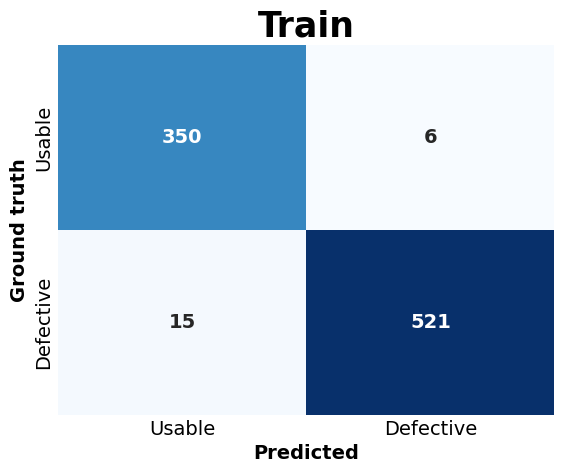

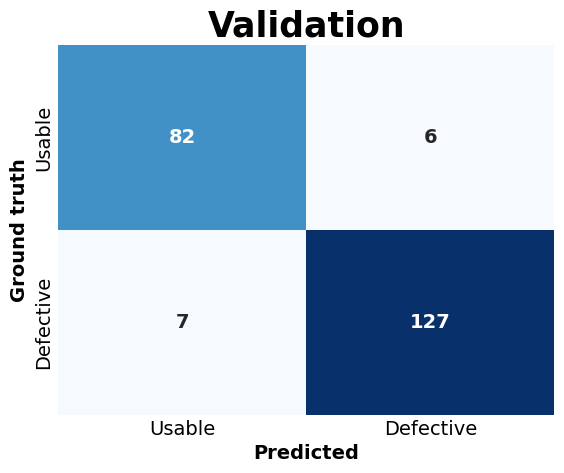

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpo0cbvgts/assets


INFO:tensorflow:Assets written to: /tmp/tmpo0cbvgts/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 15:50:28.244825: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 15:50:28.244858: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 15:50:28.245201: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpo0cbvgts
2023-08-13 15:50:28.248082: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 15:50:28.248120: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpo0cbvgts
2023-08-13 15:50:28.255947: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\xb0#\x00\x00\xc0#\x00\x00\xa4;\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x8e\xdb\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xd6\xdc\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xcc"\x00\x00\xc4"\x00\x00\xac"\x00\x00\x90"\x00\x00\x80\x1a\x00\x00\xf0\x19\x00\x00\xe0\x07\x00\x00\x90\x07\x00\x00\x00\x03\x00\x00\xd0\x02\x00\x00\xa0\

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 1s 25ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.00082467636, 'qt_std': 0.014118339, 'qt_abs_mean': 0.006677771, 'qt_abs_std': 0.012466554}


{'diff': array([ 6.57702796e-04,  1.12494789e-02, -4.47281301e-02,  4.66888770e-03,
        -6.87641203e-02, -9.44296946e-04, -8.53374542e-04,  1.36141777e-02,
         2.73637846e-02, -4.74735512e-04,  8.92875716e-04, -1.73781096e-04,
        -1.30851008e-03,  7.77697563e-02,  1.15395710e-02,  2.36543193e-02,
         4.64049727e-03,  1.48714259e-02,  8.48459080e-03, -1.51487440e-03,
        -4.13721055e-03,  3.50523461e-03, -3.50525975e-03, -1.44658051e-03,
        -6.30782801e-04,  1.83883496e-03, -1.48451375e-03, -1.62938796e-03,
        -1.25250667e-02,  5.95361926e-04, -2.25529447e-03, -5.22213057e-04,
         1.45661831e-03,  7.42346048e-03,  3.00141051e-04, -3.32903564e-02,
         9.02947038e-03,  1.71074569e-02, -1.55735237e-03, -6.17988408e-05,
        -3.95547412e-03, -6.97914511e-04, -2.52970867e-03,  8.58642394e-04,
        -1.94496708e-03, -4.24689334e-03, -1.09499029e-03, -1.58701092e-04,
         1.55040598e-03,  1.48789994e-02,  1.75947230e-03,  1.05682295e-03,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9720149253731343, 'qt_Train_acc': 0.9753363228699552, 'qt_Train_precision': 0.9867424242424242}
Confusion matrix Train 
 [[349   7]
 [ 15 521]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (190).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (233).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (237).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (379).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (394).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (398).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (437).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (244).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (330).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (346).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (4).jpeg', '../dataset/resize_128/train/1_defeituoso

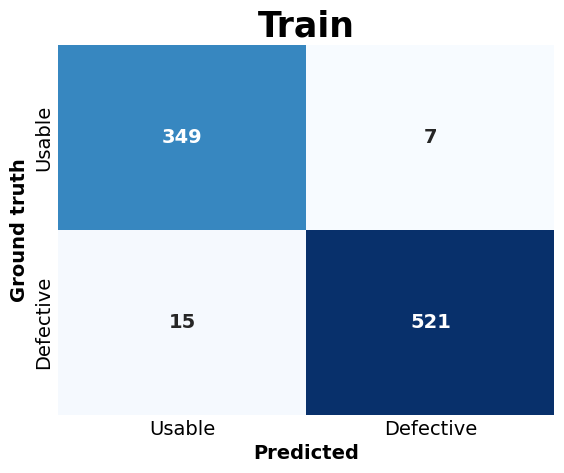

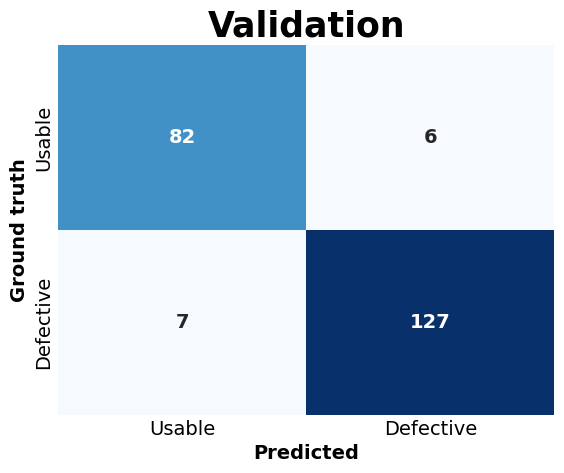

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

 1/12 [=>............................] - ETA: 1s

12/12 [==============================] - 1s 40ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9272727272727272, 'fp_Test_acc': 0.907103825136612, 'fp_Test_precision': 0.918918918918919}
Confusion matrix Test 
 [[ 64   9]
 [  8 102]]
12/12 [==============================] - 0s 35ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (448).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (455).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (463).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (469).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (512).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/r

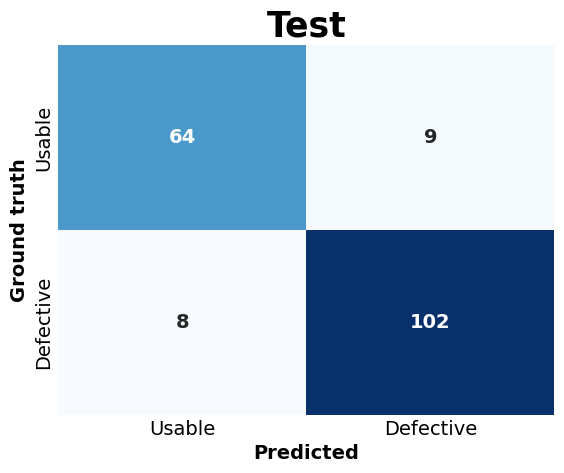

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9363636363636364, 'qt_Test_acc': 0.912568306010929, 'qt_Test_precision': 0.9196428571428571}
Confusion matrix Test 
 [[ 64   9]
 [  7 103]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (448).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (455).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (463).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (469).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (512).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (677).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpe

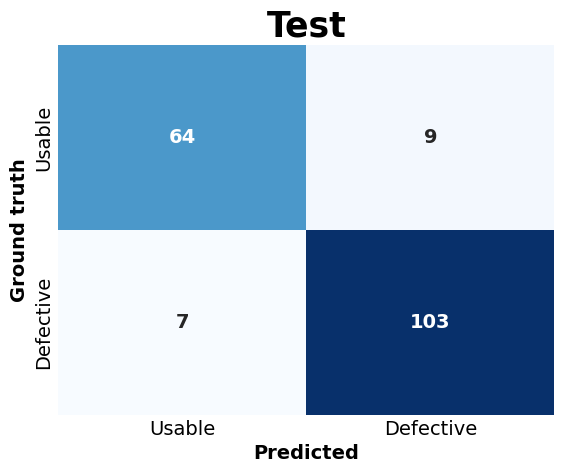

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()